## Stochastic Algorithm: Can you trust a bandit to execute an order ?

### 0. Description of the two-armed bandit algorithm and important results

In this section, we present very briefly the most important results of <a id="1" href="https://arxiv.org/abs/math/0407128v1">[1]</a> and <a id="2" href="https://arxiv.org/abs/math/0510351">[2]</a>.  
We consider a two armed bandit problem where $X_t$ represents the fraction of the total allocated to agent A. Given a uniform random variable $U_a$ over $[0, 1]$ and $p_A$ a threshold probability, if $U_a < p_A$, we update $X_t$ as follows:

$$X_{t+1} = X_{t} + \gamma_{t+1} (1-X_t)$$

We update agent B and its fraction $1-X_t$ in a similar fashion with $U_b$ and $p_B$. Moreover, note that $X_t$ is not penalized when failing the test, but decreases when B succeed as the increase in capital has to come from B.  

The problem is symmetric, so without loss of generality we consider $p_A > p_B$. It has been shown in <a id="1" href="https://arxiv.org/abs/math/0407128v1">[1]</a> that if and only if $\gamma_{t} = (\frac{C}{C+t})^\alpha$ with $\alpha=1$ and $C \leq \frac{1}{p_B}$ then the bandit is almost surely infaillible (ie: converges toward allocating all the capital to the best agent of the two). In particular, note that $C=1$ leads to an infaillible bandit.

Moreover <a id="2" href="https://arxiv.org/abs/math/0510351">[2]</a> brings us more details about the different rates of convergence. Denoting $\pi = p_A - p_b$, we get that:
- If $\frac{1}{\pi} \leq C \leq \frac{1}{p_B}$ we then get the fast convergence rate is $n^{-Cp_A}$
- If $\frac{1}{p_A} \leq C \leq  \frac{1}{\pi}$ then we have two possible rates of convergence occuring with positive probability, $n^{-C\pi}$ (slow) and $n^{-Cp_A}$ (fast)
- If $\frac{1}{p_A} \geq C$ (this include the infaillible case when $C=1$), we get a slow rate of convergence $n^{-C\pi}$

### I. Bandit with dummy agent
In this section, we do not use real data nor agents. We test the two agents with randomly sampled probabilities, but still such that $p_A > p_B$ to match the theoritical results. Notice how we match the theoritical order in convergence speeds between the different C we picked. Regarding $\alpha$, even when we're not in an infaillible setup, we still manage to converge with $\alpha \neq 1$ 

### I.a Analysis of parameters C and $\alpha$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bandits import simple_two_armed_bandit

np.random.seed(1234)
pb = 0.2
pa = 0.7
print(1/pb, 1/pa, 1/(pa-pb))

5.0 1.4285714285714286 2.0000000000000004


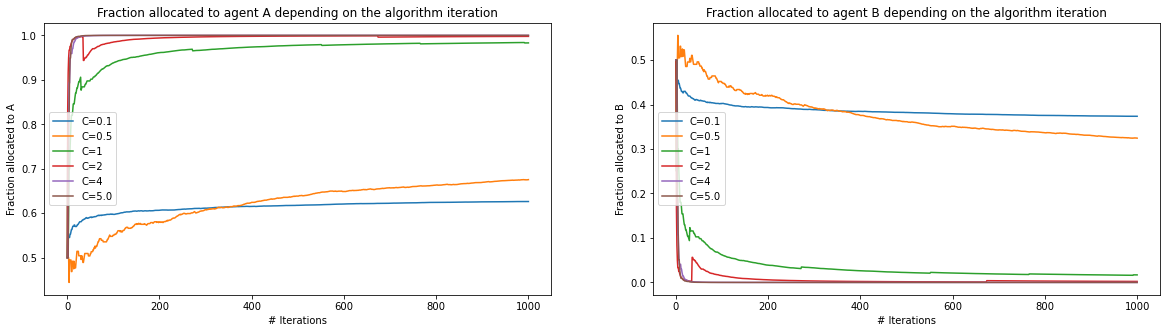

In [2]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

for c in [0.1, 0.5, 1, 2, 4, 1/pb]:
    X = 0.5  # initially, we weight each agent the same
    fracA, fracB = simple_two_armed_bandit(X, C=c, alpha=1, pa=pa, pb=pb)

    axs[0].plot(range(len(fracA)), fracA, label=f'C={c}')
    axs[0].set_xlabel('# Iterations')
    axs[0].set_ylabel('Fraction allocated to A')
    axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')
    axs[0].legend(loc='best')

    axs[1].plot(range(len(fracB)), fracB, label=f'C={c}')
    axs[1].set_xlabel('# Iterations')
    axs[1].set_ylabel('Fraction allocated to B')
    axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')
    axs[1].legend(loc='best')

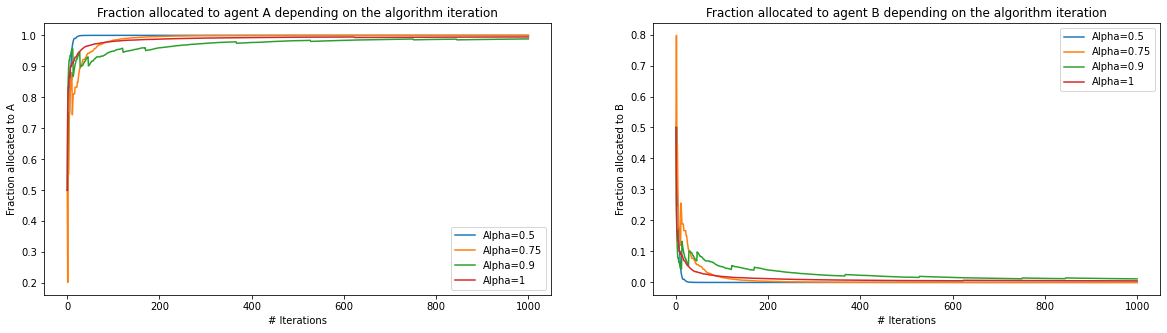

In [3]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

for a in [0.5, 0.75, 0.9, 1]:
    X = 0.5  # initially, we weight each agent the same
    fracA, fracB = simple_two_armed_bandit(X, C=1, alpha=a, pa=pa, pb=pb)

    axs[0].plot(range(len(fracA)), fracA, label=f'Alpha={a}')
    axs[0].set_xlabel('# Iterations')
    axs[0].set_ylabel('Fraction allocated to A')
    axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')
    axs[0].legend(loc='best')

    axs[1].plot(range(len(fracB)), fracB, label=f'Alpha={a}')
    axs[1].set_xlabel('# Iterations')
    axs[1].set_ylabel('Fraction allocated to B')
    axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')
    axs[1].legend(loc='best')

### I.b Speed of convergence

In this section, we compare the speed of convergence from the theory (dashed red lines) to the actual curve obtained above.
First we have a look at $\frac{1}{p_a}$, $\frac{1}{p_b}$ and $\frac{1}{p_a - p_b}$ in order to know our boundaries for C for each rate of convergence according to the theory from section 0.

As shown in our testing below, we follow the theoritical speed of convergence very well.

In [2]:
pi = pa - pb
print(1/pa, 1/pb, 1/pi)

1.4285714285714286 5.0 2.0000000000000004


Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

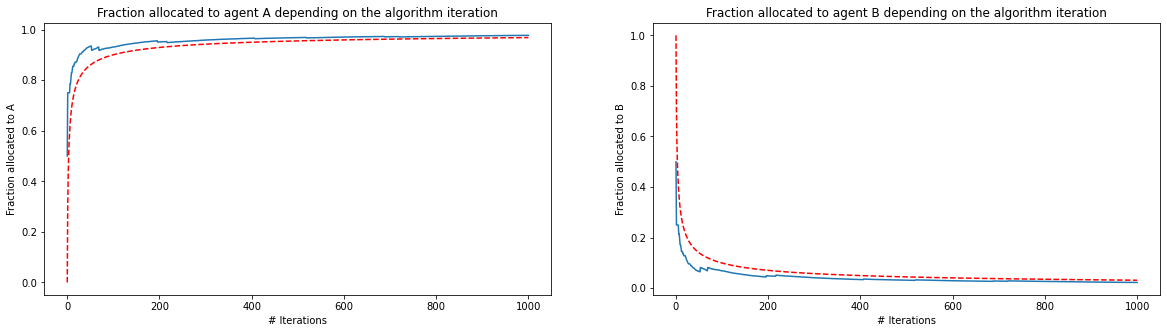

In [3]:
X = 0.5  # initially, we weight each agent the same

c = 1  # c < 1/pi -> this should give us a rate of n^(-c*pi)

fracA, fracB = simple_two_armed_bandit(X, C=c, alpha=1, pa=pa, pb=pb)

fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].plot(range(len(fracA)), fracA)
axs[0].plot(range(len(fracA)), [1-n**(-c*pi) for n in range(1, len(fracA)+1)], 'r--')
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].plot(range(len(fracA)), [n**(-c*pi) for n in range(1, len(fracA)+1)], 'r--')
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

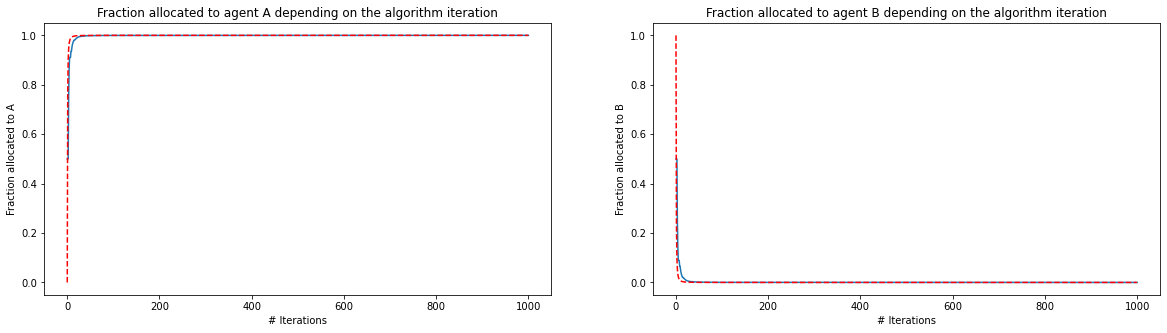

In [6]:
X = 0.5  # initially, we weight each agent the same

c = 3  # 1/pi < c < 1/pb -> this should give us a rate of n^(-c*p_a)

fracA, fracB = simple_two_armed_bandit(X, C=c, alpha=1, pa=pa, pb=pb)

fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].plot(range(len(fracA)), fracA)
axs[0].plot(range(len(fracA)), [1-n**(-c*pa) for n in range(1, len(fracA)+1)], 'r--')
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].plot(range(len(fracA)), [n**(-c*pa) for n in range(1, len(fracA)+1)], 'r--')
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

### II. Bandit with real data

In this section we use real financial data to experiment the two armed bandit algorithm with real trading agents. We implemented very simple trading agent: Random, Exponential Moving Average, and PW (following the trend by counting the increment or decrement streaks).  

The data we used is the stock price of Google in 2011, the series was resampled and averaged every two hours to limit the amount of data. In the end we habe 973 data points. First let us have a look at the data

In [7]:
# Import of libraries 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tests import test_pnl_increase
from agents import RandomAgent, ExpAvgAgent, PwAgent
from bandits import agent_two_armed_bandit

,AskPrice,BidPrice,MidPrice,AskQty,BidQty
Time,,,,,
2011-01-03 08:00:00,601.727421,601.279442,601.503431,336.446701,244.873096
2011-01-03 10:00:00,602.858438,602.595471,602.726955,332.794830,219.816909
2011-01-03 12:00:00,604.518561,604.335554,604.427058,309.168443,239.658849
2011-01-03 14:00:00,603.705293,603.517836,603.611565,345.139814,249.667111
2011-01-04 08:00:00,604.859430,604.619650,604.739540,222.355106,253.633855
...,...,...,...,...,...
2011-12-29 14:00:00,641.786011,641.602875,641.694443,210.909091,187.727273
2011-12-30 08:00:00,643.958489,643.614290,643.786390,329.909366,145.619335
2011-12-30 10:00:00,644.976757,644.721257,644.849007,210.857143,153.428571


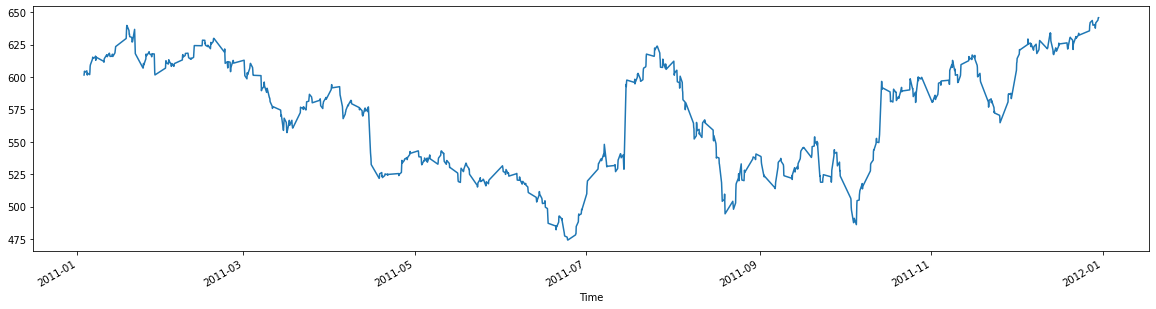

In [8]:
data = pd.read_hdf('data/resampled_google.h5')
data['MidPrice'].plot(figsize=(20,5))
data

Now we compare the agent between them and see how the bandit reacts: First we compare Random vs Random, then EMA vs EMA, PW vs PW and finally EMA vs PW. we Discuss the results obtained at the end of the section. 

Before comparing the agents between them, we estimate their respective probability to pass the test as displayed in the histogram below.

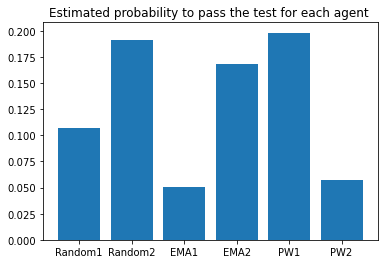

In [9]:
N = 6
agents = [RandomAgent(50000, p_buy=0.5, p_sell=0.5),
          RandomAgent(50000, p_buy=0.3, p_sell=0.3),
          ExpAvgAgent(50000, alpha=0.5),
          ExpAvgAgent(50000, alpha=0.9),
          PwAgent(50000, streak=5),
          PwAgent(50000, streak=8)
          ]
          
ns = [0] * N
for n in range(973):
        ask, bid = data.iloc[n][['AskPrice', 'BidPrice']]
        for i, a in enumerate(agents):
            a.act(ask, bid)
            a.calc_pnl(bid)
            if test_pnl_increase(a):
                ns[i] += 1

ps = [n/973 for n in ns]
plt.bar(x=['Random1', 'Random2', 'EMA1', 'EMA2', 'PW1', 'PW2'], height=ps)
plt.title("Estimated probability to pass the test for each agent ")

# compute pis to get the speed of convergence
pi1, pi2, pi3, pi4 = ps[1]-ps[0], ps[3]-ps[2], ps[4]-ps[5], ps[4]-ps[3]

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

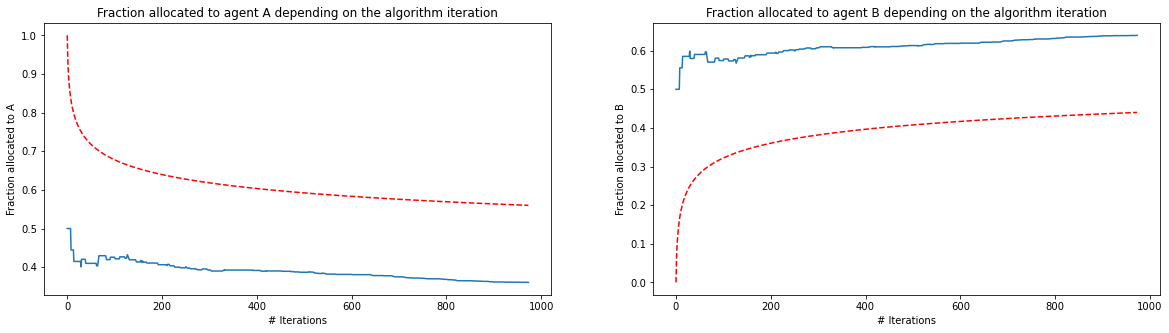

In [10]:
X = 0.5  # initially, we weight each agent the same
agentA = RandomAgent(50000, p_buy=0.5, p_sell=0.5)  # random impatitent
agentB = RandomAgent(50000, p_buy=0.3, p_sell=0.3)

fracA, fracB = agent_two_armed_bandit(data, agentA, agentB, X, C=1, alpha=1)

fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(range(len(fracA)), fracA)
axs[0].plot(range(len(fracA)), [n**(-pi1) for n in range(1, len(fracA)+1)], 'r--')
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].plot(range(len(fracA)), [1-n**(-pi1) for n in range(1, len(fracA)+1)], 'r--')
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

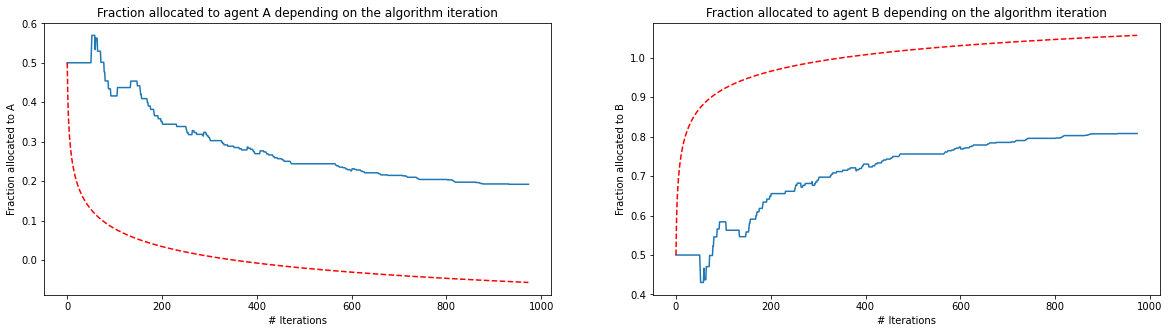

In [11]:
X = 0.5  # initially, we weight each agent the same
agentA = ExpAvgAgent(50000, alpha=0.5)
agentB = ExpAvgAgent(50000, alpha=0.9)

fracA, fracB = agent_two_armed_bandit(data, agentA, agentB, X, C=4, alpha=1)
gammas = []
fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(range(len(fracA)), fracA)
axs[0].plot(range(len(fracA)), [n**(-pi2)-0.5 for n in range(1, len(fracA)+1)], 'r--')
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].plot(range(len(fracA)), [1-n**(-pi2)+0.5 for n in range(1, len(fracA)+1)], 'r--')
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

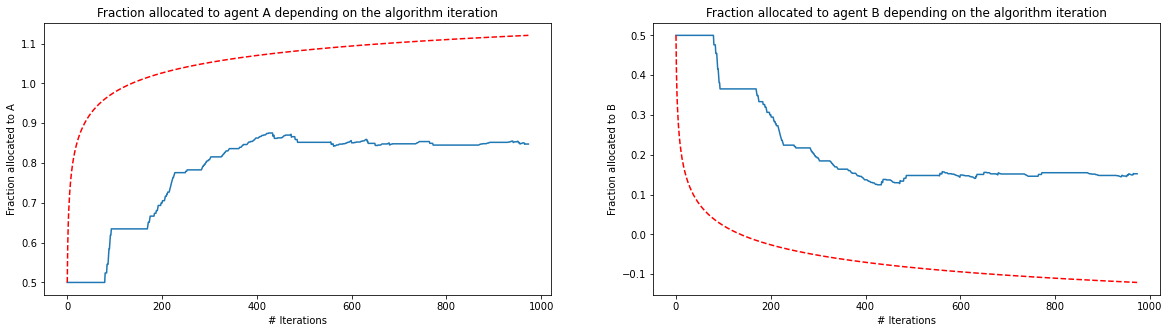

In [12]:
X = 0.5  # initially, we weight each agent the same
agentA = PwAgent(50000, streak=5)
agentB = PwAgent(50000, streak=8)

fracA, fracB = agent_two_armed_bandit(data, agentA, agentB, X, C=4, alpha=1)

fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(range(len(fracA)), fracA)
axs[0].plot(range(len(fracA)), [1-n**(-pi3)+0.5 for n in range(1, len(fracA)+1)], 'r--')
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].plot(range(len(fracA)), [n**(-pi3)-0.5 for n in range(1, len(fracA)+1)], 'r--')
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

Text(0.5, 1.0, 'Fraction allocated to agent B depending on the algorithm iteration')

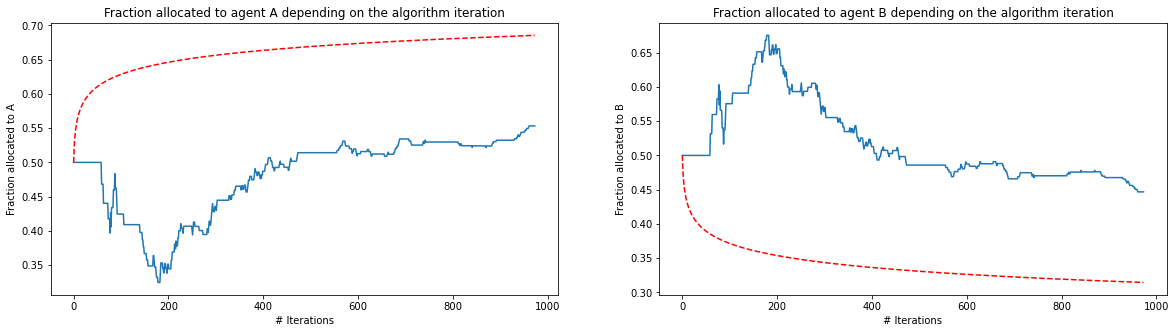

In [13]:
X = 0.5  # initially, we weight each agent the same
agentA = PwAgent(50000, streak=5)
agentB = ExpAvgAgent(50000, alpha=0.9)


fracA, fracB = agent_two_armed_bandit(data, agentA, agentB, X, C=4, alpha=1)

fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(range(len(fracA)), fracA)
axs[0].plot(range(len(fracA)), [0.5 + (1-n**(-pi4)) for n in range(1, len(fracA)+1)], 'r--')
axs[0].set_xlabel('# Iterations')
axs[0].set_ylabel('Fraction allocated to A')
axs[0].set_title('Fraction allocated to agent A depending on the algorithm iteration')

axs[1].plot(range(len(fracB)), fracB)
axs[1].plot(range(len(fracA)), [n**(-pi4)-0.5 for n in range(1, len(fracA)+1)], 'r--')
axs[1].set_xlabel('# Iterations')
axs[1].set_ylabel('Fraction allocated to B')
axs[1].set_title('Fraction allocated to agent B depending on the algorithm iteration')

We see that in our testing, the bandit algorithm always seem to pick one agent over the other, there seems to be no indecision yet. 

The on with the biggest difference is the EMA agent while the Random one is the one which the algorithm has the biggest trouble to discriminate. This may be due to the fact that the former is stochastic while the later is a deterministic strategy.

In order to gain an idea of the relevance of the bandit's pick, we estimate the probability for each agent to pass the test and display it in the histogram below. It seems indeed that the bandit always picked the best agent.

In our final testing, we compared two agent with "good" passing probabilities: EMA2 and PW1. Interrestingly, the bandit seems to have a hard time to discriminate between these two agents, as their probabilties are close but still not equal. It would probably require many more iterations to make it converge.

Speed-wise, it seems our results are not too far-fetched, as we see the rate of decreasing is locally similar, after several iterations, but the first iteration always lag behind theoritical speed. However we hardly match the curve the way we did in the first section, using theoritical random variable. Part of the gap can be attributed to our estimation of $p$.

### III. Extension: what happends with n agents ?

In this section we try to go beyond the theoritical framework presented in section 0 and see how the algorithm behaves when dealing with more than 2 agents. In this implementation, we kept the same reward for the agent passing the test, the extra capital provided being splitted proportionnaly between evry other agent (see bandit.py for more details).  

Just like before, we first try a theoritical model, using random variables and defined probabilities to pass the test and then an real agent based bandit, reusing the same data, agents and test as in section 2.

In [14]:
from bandits import simple_multi_armed_bandit, agent_multi_armed_bandit

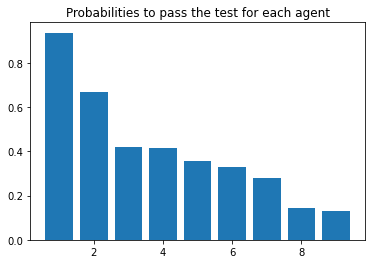

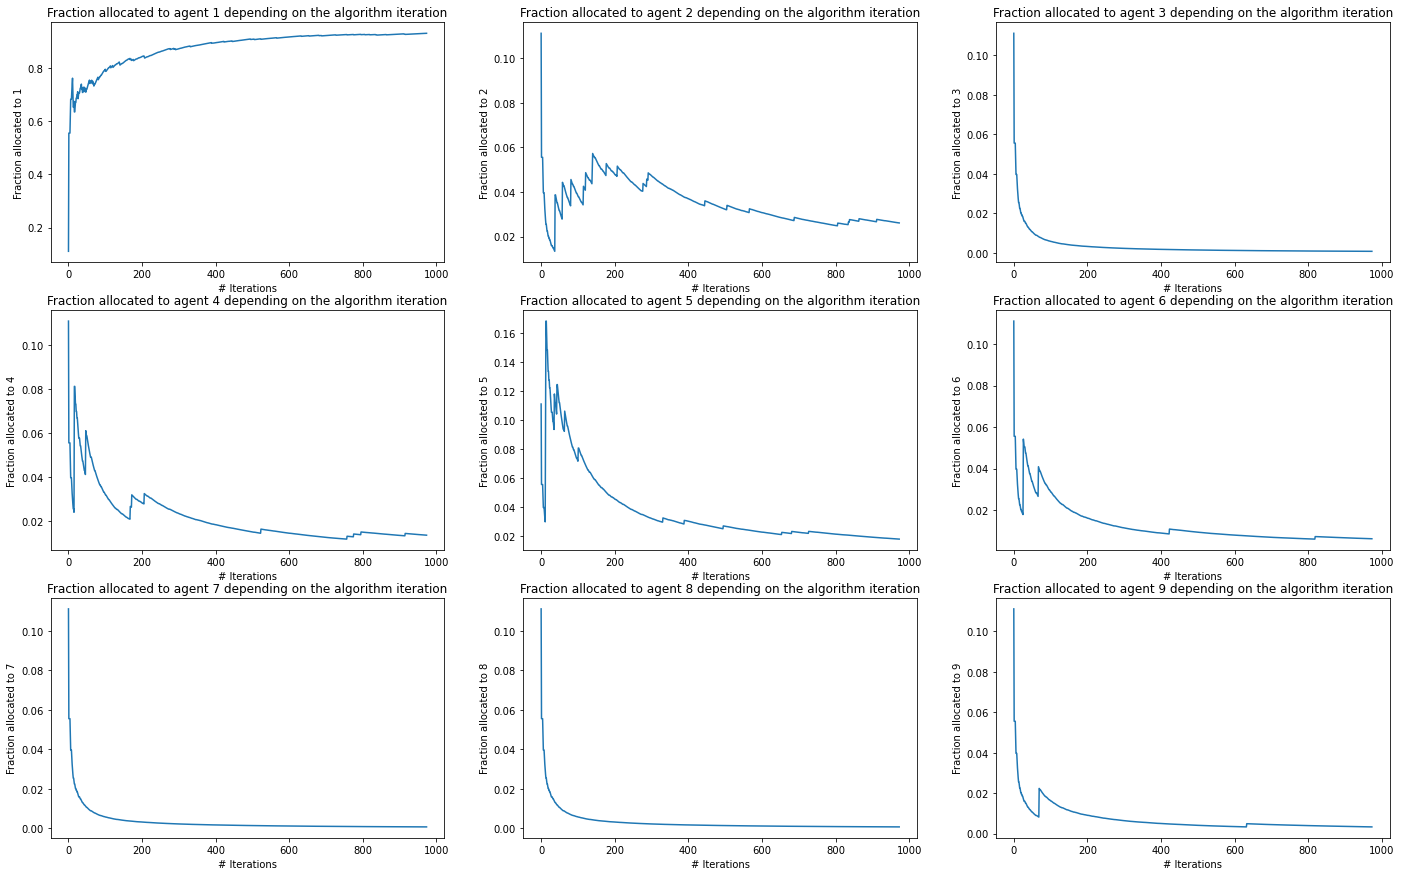

In [15]:
ps = sorted([np.random.random_sample() for x in range(9)])
ps.reverse()
plt.bar(x=range(1, len(ps)+1), height=ps)
plt.title('Probabilities to pass the test for each agent')

fig, axs = plt.subplots(3,3, figsize=(24,15))

X = [1/9 for n in range(9)]
fracs = simple_multi_armed_bandit(X, C=1, alpha=1, ps=ps)

for i in range(3):
    for j in range(3):
        axs[i, j].plot(range(fracs.shape[0]), fracs[:, i*3+j])
        axs[i, j].set_xlabel('# Iterations')
        axs[i, j].set_ylabel(f'Fraction allocated to {i*3+j+1}')
        axs[i, j].set_title(f'Fraction allocated to agent {i*3+j+1} depending on the algorithm iteration')

We see in the results above that the bandit manages fairly well to eliminate the worst agents of the list, however it still struggles to pick the best one among similar probabilities. Indeed, the agent #2 is the one being favoritized by the bandit, while the agent #1 is the one with the highest estimated chances to pass. Although both are very close and this result could be due to estimation artefacts, it would seems that the bandit failed by a short margin.

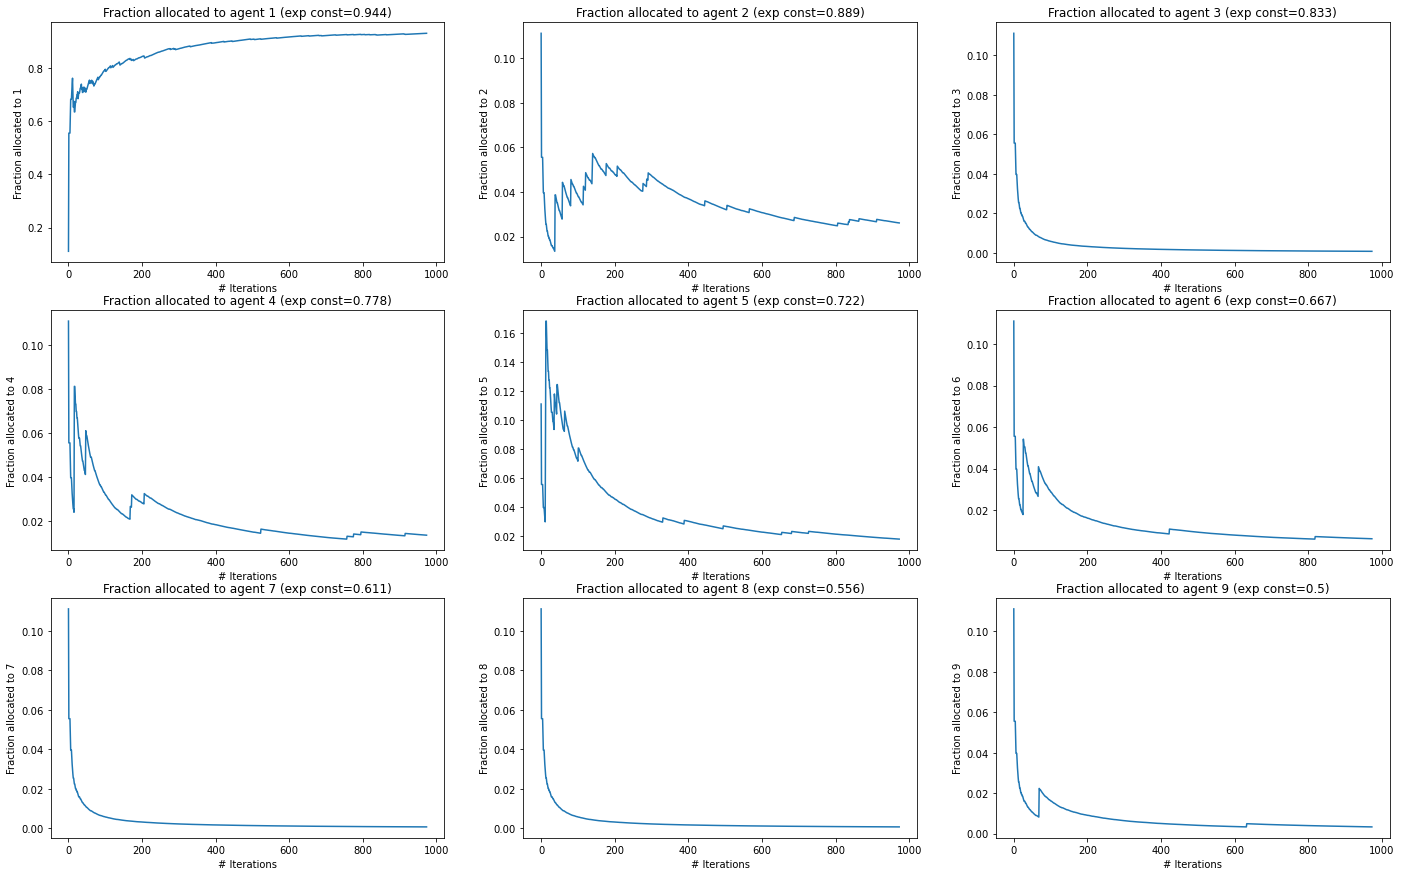

In [16]:
N = 9
agents = [ExpAvgAgent(50000, alpha=1/2+(N-i-1)/N*1/2) for i in range(N)]
X = [1/N for a in agents]
agent_multi_armed_bandit(data, agents, X, C=1, alpha=1)

fig, axs = plt.subplots(3,3, figsize=(24,15))
for i in range(3):
    for j in range(3):
        axs[i, j].plot(range(fracs.shape[0]), fracs[:, i*3+j])
        axs[i, j].set_xlabel('# Iterations')
        axs[i, j].set_ylabel(f'Fraction allocated to {i*3+j+1}')
        axs[i, j].set_title(f'Fraction allocated to agent {i*3+j+1} (exp const={np.round(agents[i*3+j].alpha, 3)})')

Text(0.5, 1.0, 'Estimated probability to pass the test for each agent ')

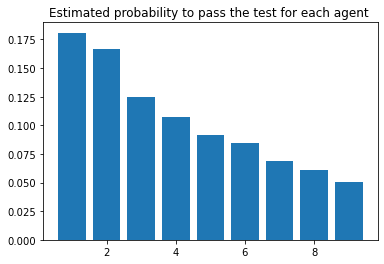

In [17]:
N = 9
agents = [ExpAvgAgent(50000, alpha=1/2+(N-i-1)/N*1/2) for i in range(N)]
ns = [0] * N
for n in range(973):
        ask, bid = data.iloc[n][['AskPrice', 'BidPrice']]
        for i, a in enumerate(agents):
            a.act(ask, bid)
            a.calc_pnl(bid)
            if test_pnl_increase(a):
                ns[i] += 1

ps = [n/973 for n in ns]
plt.bar(x=range(1, N+1), height=ps)
plt.title("Estimated probability to pass the test for each agent ")

In this more practical example, we observe a very similar behaviour as in the previous one.  
The agent with poor performances are quickly eliminated, however, the bandit still has a hard time discriminating among the best agents.
Once again, it seems it favoritizes the second best instead of the best one, but contrary to the previous scenario, our estimation of the probability of passing is not exactly the same as the one calculated by the bandit (see bandit.py for more details, in a nutshell, we do not recompute PnL for each agent at each iteration), thus we cannot tell for sure as is. However based on our testing, it would seem that increasing the value of alpha increases the probability of passing, so we would still expect agent #1 to win over #agent 2.

In the end these testing have shown that despite some caveats, the framework still holds fairly well in practice when extended to a multi agent setup.